# Formula 1

## Function Initation

In [66]:
# Importing library functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

import patsy
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import StandardScaler




## Mounting Google Drive

In [67]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Formula 1 Dataframe

In [68]:
# Importing Formula 1 Dataframe

circuits = "/content/drive/MyDrive/Formula_1_Data/circuits.csv"
constructors = "/content/drive/MyDrive/Formula_1_Data/constructors.csv"
status = "/content/drive/MyDrive/Formula_1_Data/status.csv"
constructor_results = "/content/drive/MyDrive/Formula_1_Data/constructor_results.csv"
pit_stops = "/content/drive/MyDrive/Formula_1_Data/pit_stops.csv"
sprint_results = "/content/drive/MyDrive/Formula_1_Data/sprint_results.csv"
races = "/content/drive/MyDrive/Formula_1_Data/races.csv"
qualifying = "/content/drive/MyDrive/Formula_1_Data/qualifying.csv"
results = "/content/drive/MyDrive/Formula_1_Data/results.csv"
seasons = "/content/drive/MyDrive/Formula_1_Data/seasons.csv"
driver_standings = "/content/drive/MyDrive/Formula_1_Data/driver_standings.csv"
lap_times = "/content/drive/MyDrive/Formula_1_Data/lap_times.csv"
drivers = "/content/drive/MyDrive/Formula_1_Data/drivers.csv"
constructor_standings = "/content/drive/MyDrive/Formula_1_Data/constructor_standings.csv"



## Exploratory Data Analysis - Results Dataframe

In [ ]:
# Path to Results
raw_results = pd.read_csv(results)

results = raw_results.copy()
results.describe(include='all')

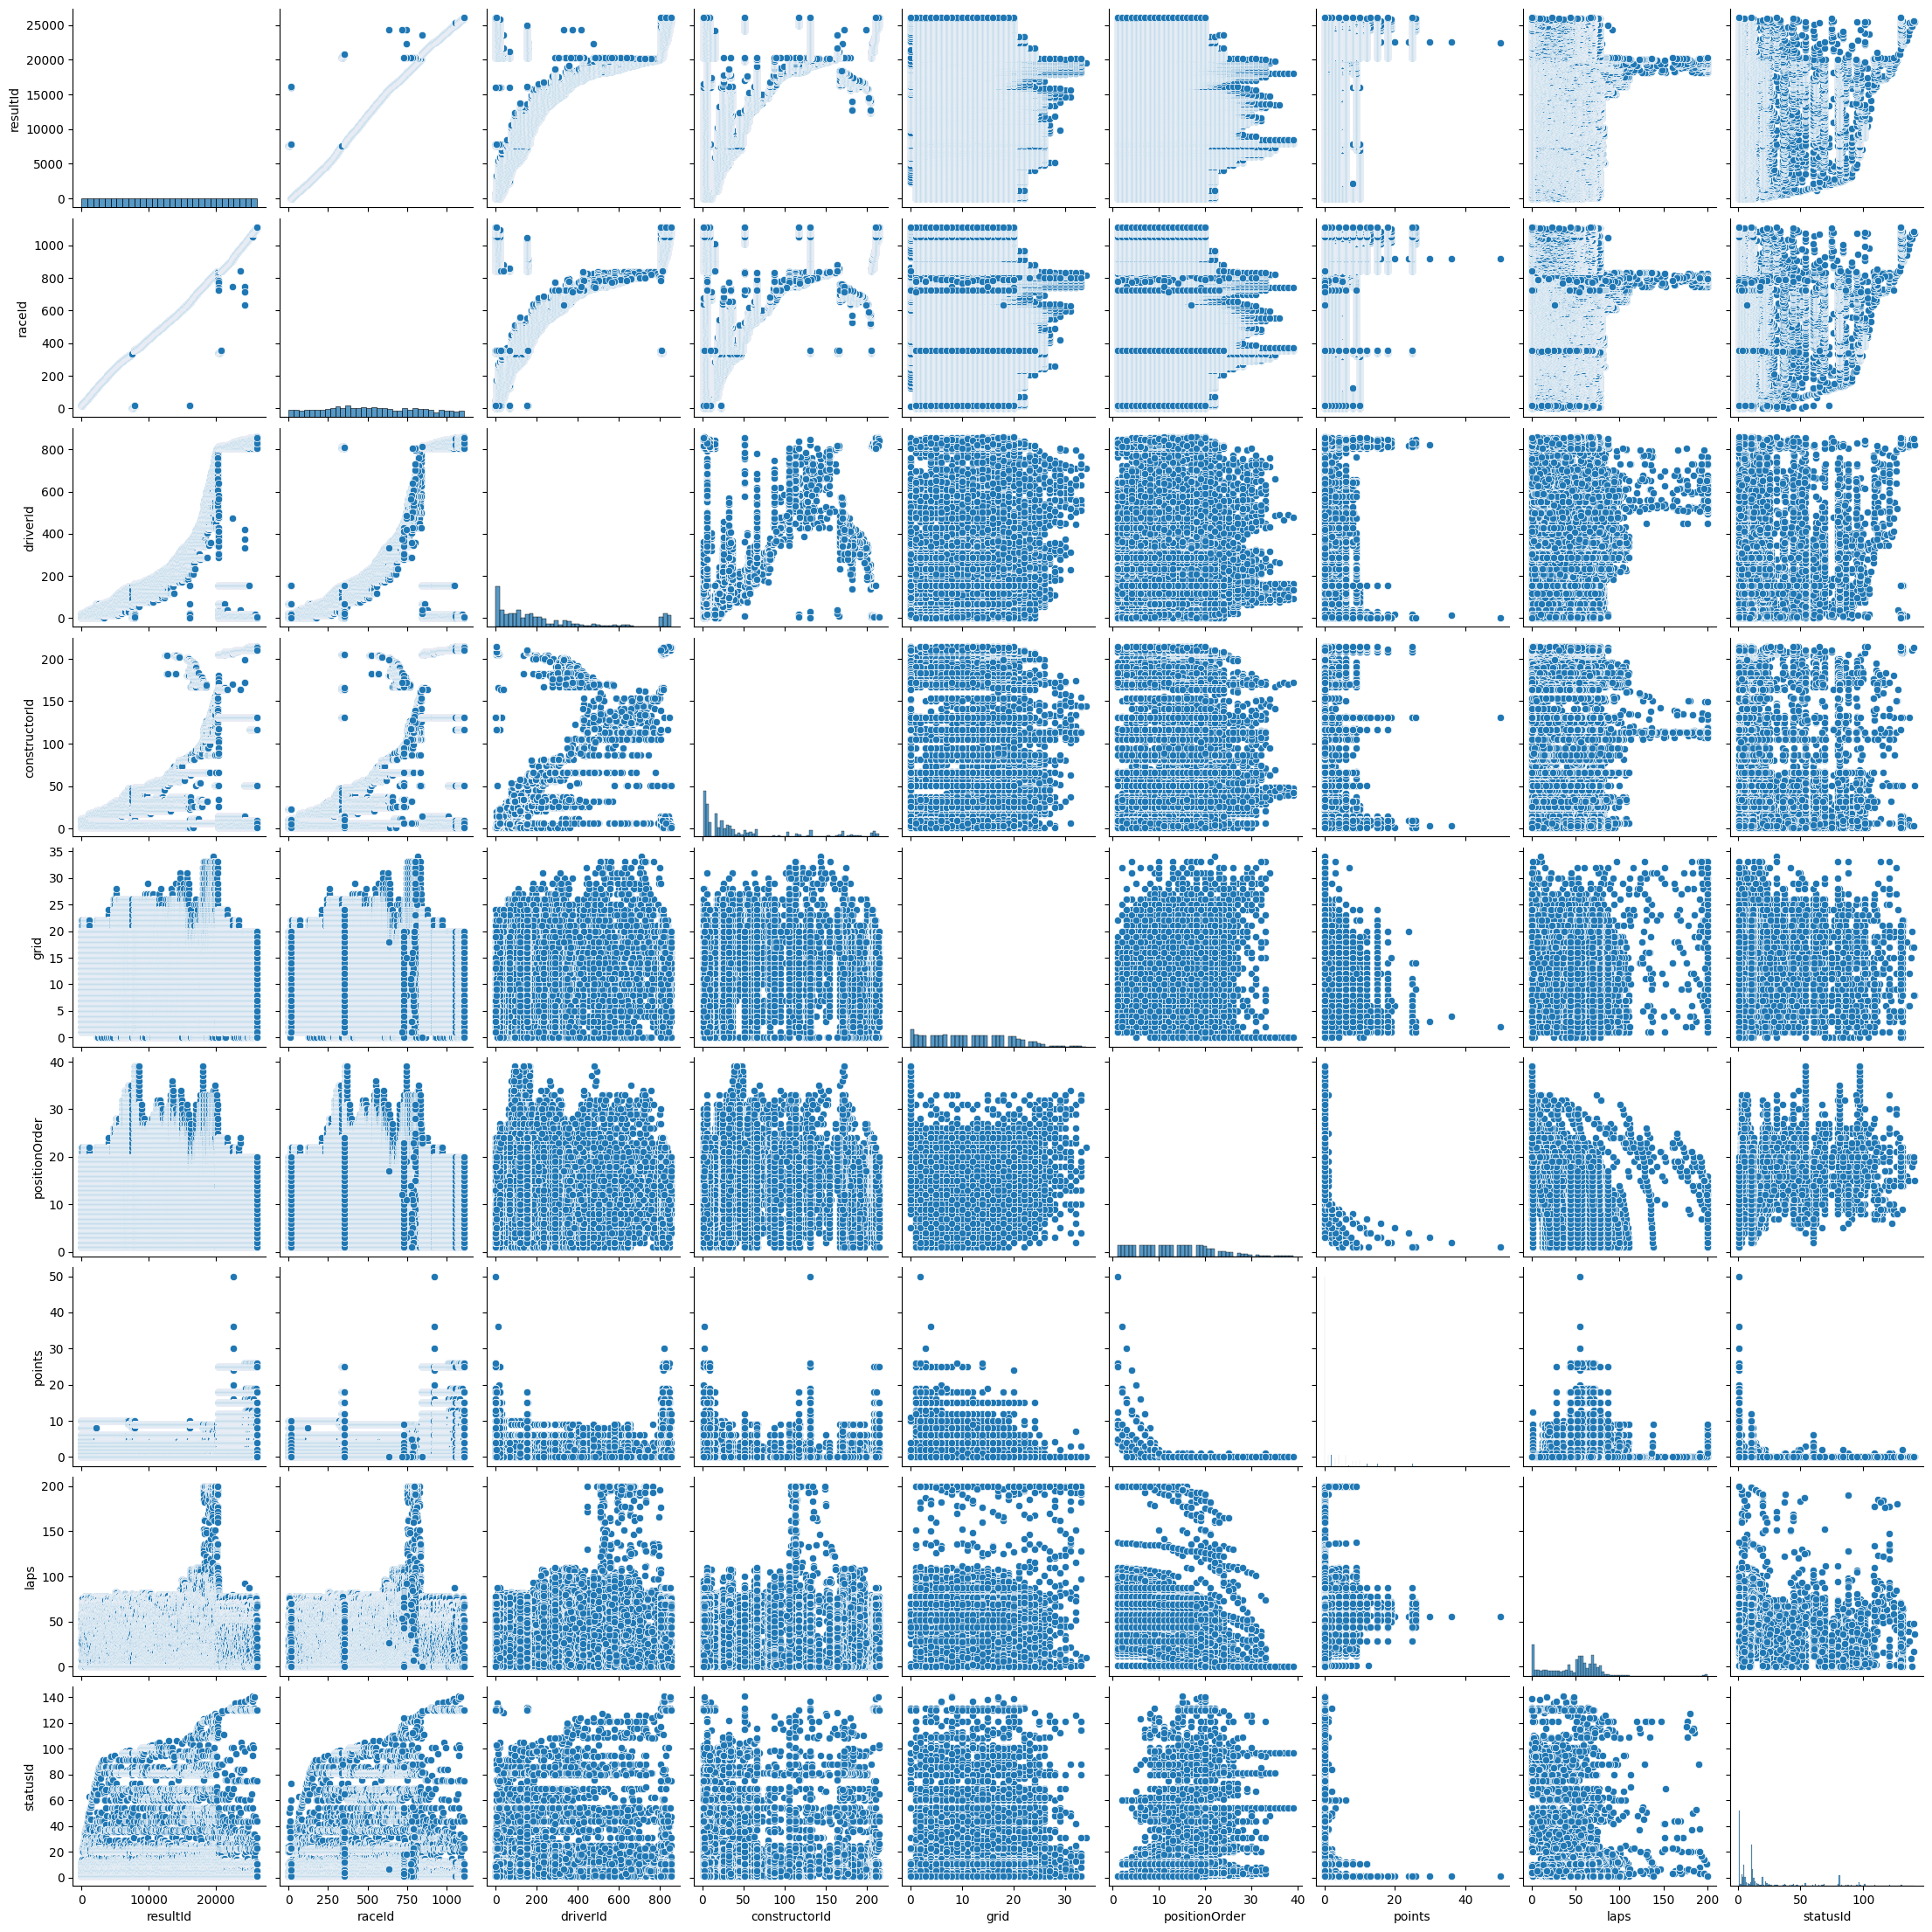

In [53]:
# Display Result Visualaztion
numerical_columns = results.select_dtypes(include=['int64', 'float64']).columns
sns.pairplot(results[numerical_columns])
plt.show()

## Exploratory Data Analysis - Constructor Dataframe

In [14]:
# Path to Constructor Results

raw_constructor_results = pd.read_csv(constructor_results)

constructor = raw_constructor_results.copy()
constructor.describe(include='all')

,constructorResultsId,raceId,constructorId,points,status
count,12290.000000,12290.000000,12290.000000,12290.000000,12290
unique,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,\N
freq,NaN,NaN,NaN,NaN,12273
mean,8191.007242,511.762815,44.661676,3.859967,NaN
std,5561.388146,302.677952,57.851043,7.555135,NaN
min,1.000000,1.000000,1.000000,0.000000,NaN
25%,3073.250000,281.000000,6.000000,0.000000,NaN
50%,6145.500000,477.000000,22.000000,0.000000,NaN
75%,13698.750000,722.000000,53.000000,4.000000,NaN


## Exploratory Data Analysis - Pitstop Dataframe

In [ ]:
# Path to Pitstop data


raw_pit_stops = pd.read_csv("/content/drive/MyDrive/Formula_1_Data/pit_stops.csv")

# Copy dataset
pit_stops = raw_pit_stops.copy()
pit_stops.describe(include='all')

## Exploratory Data Analysis - Driver DataFrame

In [8]:
# Path to Driver data
driver_data = "/content/drive/MyDrive/Formula_1_Data/drivers.csv"


raw_driver = pd.read_csv(driver_data)

# Copy dataset
drivers = raw_driver.copy()
drivers.describe(include='all')

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
count,857.000000,857,857,857,857,857,857,857,857
unique,NaN,857,45,95,476,798,839,42,857
top,NaN,hamilton,\N,\N,John,Taylor,1935-07-23,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
freq,NaN,1,803,757,14,5,2,165,1
mean,429.057176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,247.632402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,215.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,429.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,643.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Visualizations:



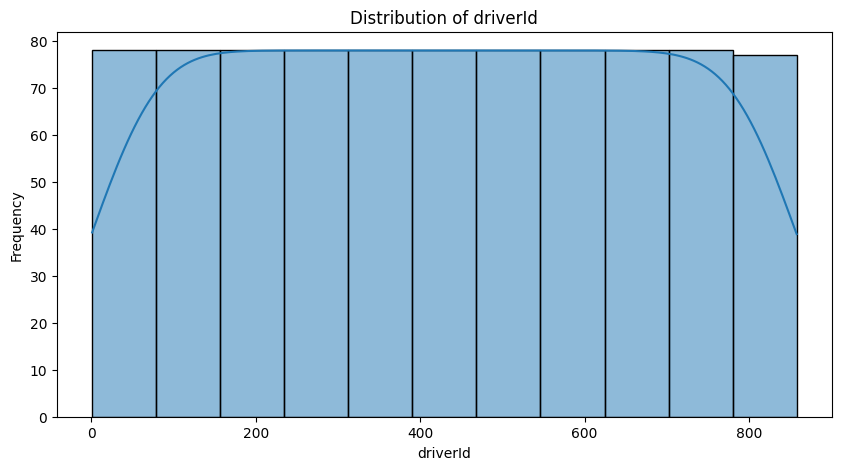

In [9]:
# Driver Histograms

# Visualize key distributions and relationships
print("Visualizations:\n")

# Numerical Columns
num_columns = drivers.select_dtypes(include=['int64', 'float64']).columns
for col in num_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(drivers[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [10]:
# Check for NA Values
drivers.isna().sum()


driverId       0
driverRef      0
number         0
code           0
forename       0
surname        0
dob            0
nationality    0
url            0
dtype: int64

## Correlation Matrix

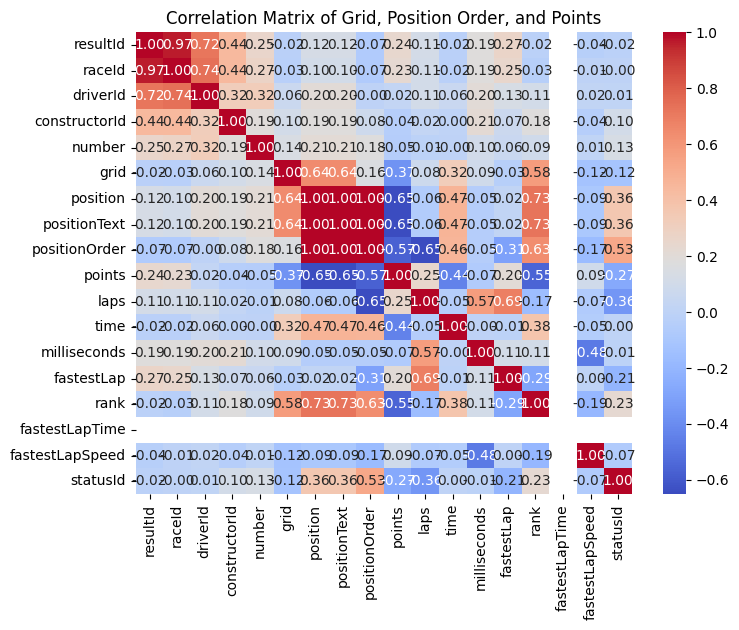

In [20]:
# Correlation Matrix
results_data = "/content/drive/MyDrive/Formula_1_Data/results.csv"
results = pd.read_csv(results_data)

# Replace '\\N' with NaN and convert to numeric
results = results.replace('\\N', np.nan).apply(pd.to_numeric, errors='coerce')

numerical_columns = results.select_dtypes(include=['float64', 'int64']).columns

# Define Correlation Matrix
correlation_matrix = results.corr().loc[numerical_columns, numerical_columns]

# Print Correlation_Matrix
correlation_matrix

# Correlation Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Grid, Position Order, and Points')
plt.show()

# fastestlaptime is creating gap in the matrix and needs to be removed

In [ ]:
# Displays Graphical Replationships
sns.pairplot(results[numerical_columns])
plt.show()

In [ ]:
# Deeper Correlation Matrix Insights

## Dataframe Merger

In [5]:
# Add prefixes to column names to avoid conflicts
results = pd.read_csv("/content/drive/MyDrive/Formula_1_Data/results.csv") # Read the results DataFrame from the file
results_df = results.add_prefix('results_')
races_data = "/content/drive/MyDrive/Formula_1_Data/races.csv"
races = pd.read_csv(races_data)
races_df = races.add_prefix('races_')

# Read the drivers data into a DataFrame
drivers_data = "/content/drive/MyDrive/Formula_1_Data/drivers.csv" # Assuming drivers.csv is the correct file
drivers = pd.read_csv(drivers_data)
drivers_df = drivers.add_prefix('drivers_')  # Now you can add the prefix

constructors_data = "/content/drive/MyDrive/Formula_1_Data/constructors.csv"
constructors = pd.read_csv(constructors_data)
constructors_df = constructors.add_prefix('constructors_')
#pit_stops = pd.read_csv(pit_stops)
#pit_stops_df = pit_stops.add_prefix('pit_stops_')

# Remove the prefixes from the keys
results.rename(columns={'results_raceId': 'raceId', 'results_driverId': 'driverId', 'results_constructorId': 'constructorId'}, inplace=True)
races.rename(columns={'races_raceId': 'raceId'}, inplace=True)
drivers.rename(columns={'drivers_driverId': 'driverId'}, inplace=True)
constructors.rename(columns={'constructors_constructorId': 'constructorId'}, inplace=True)


# Merge the results dataframe with the races dataframe on 'raceId'
df_merged = results.merge(races, on='raceId', how='left')

# Merge the resulting dataframe with the drivers dataframe on 'driverId'
df_merged = df_merged.merge(drivers, on='driverId', how='left')

# Merge the resulting dataframe with the constructors dataframe on 'constructorId'
df_merged = df_merged.merge(constructors, on='constructorId', how='left')

df_merged['points_gt10'] = (df_merged['points'] > 10).astype(int)
df_merged.head()

# Display the first few rows of the merged dataframe
#print("\nMerged DataFrame:")
#print(df_merged.head())
#df_merged

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,forename,surname,dob,nationality_x,url_y,constructorRef,name_y,nationality_y,url,points_gt10
0,1,18,1,1,22,1,1,1,1,10.0,...,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,0
1,2,18,2,2,3,5,2,2,2,8.0,...,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,0
2,3,18,3,3,7,7,3,3,3,6.0,...,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,0
3,4,18,4,4,5,11,4,4,4,5.0,...,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,0
4,5,18,5,1,23,3,5,5,5,4.0,...,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,0


## One Hot Encoding

In [72]:
# One Hot Encoding
categorical_columns_new = df_merged.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df_merged, columns=categorical_columns_new)

scaler = StandardScaler()
numerical_columns_new = df_encoded.select_dtypes(include=['float64', 'int64']).columns
df_encoded[numerical_columns_new] = scaler.fit_transform(df_encoded[numerical_columns_new])

# Display the first few rows of the final dataframe
print("\nFinal DataFrame for Machine Learning:")
print(df_encoded.head())
print(f"\nFinal DataFrame Shape: {df_encoded.shape}")



Final DataFrame for Machine Learning:
   resultId    raceId  driverId  constructorId      grid  positionOrder  \
0 -1.731820 -1.711704 -0.973223      -0.798069 -1.405785      -1.539515   
1 -1.731688 -1.711704 -0.969554      -0.781464 -0.852738      -1.409643   
2 -1.731555 -1.711704 -0.965885      -0.764858 -0.576214      -1.279772   
3 -1.731422 -1.711704 -0.962217      -0.748252 -0.023167      -1.149900   
4 -1.731289 -1.711704 -0.958548      -0.798069 -1.129261      -1.020029   

     points      laps  statusId     year  ...  \
0  1.918025  0.401114 -0.630555  0.89433  ...   
1  1.444051  0.401114 -0.630555  0.89433  ...   
2  0.970076  0.401114 -0.630555  0.89433  ...   
3  0.733088  0.401114 -0.630555  0.89433  ...   
4  0.496101  0.401114 -0.630555  0.89433  ...   

   url_http://en.wikipedia.org/wiki/Trojan_(Racing_team)  \
0                                              False       
1                                              False       
2                                  

## Decision Tree

In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Assuming df_merged is created in a previous cell, you need to bring it into
# the current scope if you are running this in a new cell. If it's in a
# previous cell, you can run that cell first, or copy and paste the code
# that creates df_merged into this cell above this comment.
# For demonstration purposes, I'll create a sample df_merged here.
# Replace this with your actual df_merged creation code.
# data = (df_merged['points'] > 10).astype(int) # Commenting out this line as it overwrites df_merged
# df_merged = pd.DataFrame(data) # Commenting out this line as it overwrites df_merged

# One Hot Encoding
categorical_columns = df_merged.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df_merged, columns=categorical_columns)

# Separate features and target variable
X = df_encoded.drop('points_gt10', axis=1)  # Use df_encoded instead of df_merged
y = df_encoded['points_gt10']

# Handle Missing Values (e.g., Imputation)
imputer = SimpleImputer(strategy='mean') # Replace missing values with the mean
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.0


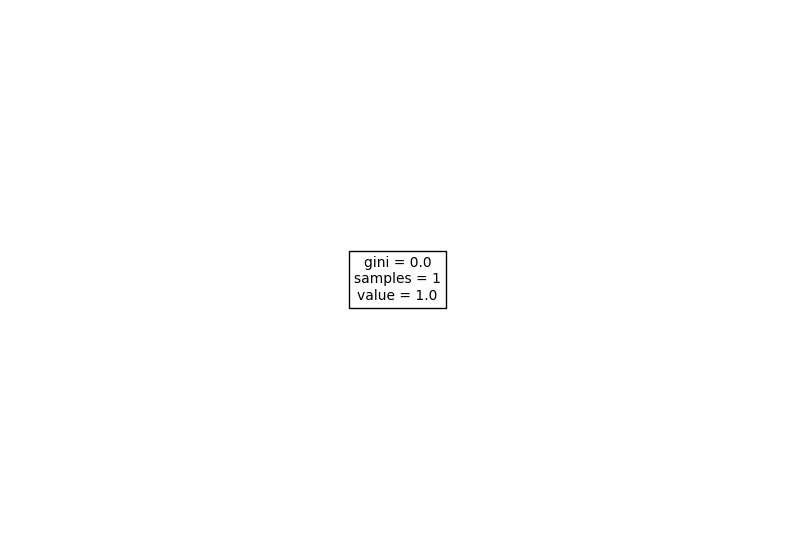

In [4]:
# prompt: create a section of code to display the decision tree from the code above

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Assuming 'X' was originally a DataFrame, get the column names before transformation
feature_names = df_encoded.drop('points_gt10', axis=1).columns # Get column names from the original DataFrame

plt.figure(figsize=(10, 7))
plot_tree(model, feature_names=feature_names, class_names=['0', '1'], fontsize=10, filled=True)
plt.show()


## Sandbox

### These sections of code were me experimenting with different approaches.

In [ ]:
# Driver ID vs Duration

x_data = pitstops['driverId']
y_data = pitstops['duration']

plt.scatter(x_data, y_data)
plt.xlabel('Driver ID')
plt.ylabel('Duration')
plt.title('Driver ID vs Pit Stop Duration')
plt.show()

In [ ]:
# Points vs Constructor

x_data = constructor['constructorResultsId']
y_data = constructor['points']

plt.scatter(x_data, y_data)
plt.xlabel('constructorResultsId')
plt.ylabel('Points')
plt.title('Points vs Constructor Results ID')
plt.show()

In [ ]:
# Merging Results & Driver Dataframe

results = results.rename.add_prefix('results_')
drivers = drivers.rename.add_prefix('drivers_')

results.rename(columns={'results_raceId': 'raceId', 'results_driverId': 'driverId'})


In [ ]:
# Cleaning Results Data

results_data = "/content/drive/MyDrive/Formula_1_Data/results.csv"

raw_results = pd.read_csv(results_data)

results = raw_results.copy()
results.dropna(inplace=True)

ten_plus_points = '10_plus_points'
results[ten_plus_points] = (results['points'] >= 10)
results.head()

# Replacing Strings with
results['position'] = results['position'].replace('\\N', np.nan)
results['positionText'] = results['positionText'].replace('R', np.nan)
results['positionText'] = results['positionText'].replace('D', np.nan)
results['positionText'] = results['positionText'].replace('N', np.nan)
results['positionText'] = results['positionText'].replace('W', np.nan)
results['positionText'] = results['positionText'].replace('F', np.nan)
results['positionText'] = results['positionText'].replace('E', np.nan)

results['points'] = results['points'].astype(float)


results.head(10)

In [ ]:
# Results Columns
results.dtypes

In [ ]:
# Results Missing Values
results.info()

In [ ]:
# Numeric Column Distribution
results.describe()

In [ ]:
# Driver ID vs Points

driver_id = results['driverId']
Points = results['points']

plt.bar(x=driver_id, height=Points, width=-3, bottom=1, align="edge")




In [ ]:
# prompt: create a bar chart for driver_id and points greater than 10

driver_id = results[results['points'] > 10]['driverId']
Points = results[results['points'] > 10]['points']

plt.bar(x=driver_id, height=Points, width=-3, bottom=1, align="edge")
plt.title('Driver ID vs Points (Points > 10)')
plt.xlabel('Driver ID')
plt.ylabel('Points')
plt.show()


In [ ]:
# prompt: display driver_id with points greater than 10

driver_id = results[results['points'] > 10]['driverId']
print(driver_id)


In [ ]:
# Drivers with DQs

results[results['statusId'] == 2]['driverId']


In [ ]:
# Logistic Regression

# Create a logistic regression model
model = LogisticRegression(solver='lbfgs', random_state=0)

# Define the features and target variable
features = ['driverId', 'constructorId', 'grid', 'position', 'positionText', 'points']
target = '10_plus_points'

# Decision Tree Training and & Testing Datasets
np.random.seed(1)
is_test = np.random.rand(len(results)) < 0.2

train_dataset = results[~is_test]
test_dataset = results[is_test]

print("Training examples: ", len(train_dataset))

print("Testing examples: ", len(test_dataset))

# Convert the '10_plus_points' column to numeric, replacing '\\N' with NaN
train_dataset['10_plus_points'] = pd.to_numeric(train_dataset['10_plus_points'], errors='coerce')
test_dataset['10_plus_points'] = pd.to_numeric(test_dataset['10_plus_points'], errors='coerce')

# Replace NaN values with 0
train_dataset['10_plus_points'].fillna(0, inplace=True)
test_dataset['10_plus_points'].fillna(0, inplace=True)

# Drop rows with NaN values in the features
train_dataset.dropna(subset=features, inplace=True)
test_dataset.dropna(subset=features, inplace=True)

# Train the model
model.fit(train_dataset[features], train_dataset[target])

# Predict the target variable for the test dataset
predictions = model.predict(test_dataset[features])

# Evaluate the model
accuracy = model.score(test_dataset[features], test_dataset[target])
print('Accuracy:', accuracy)
# Create a confusion matrix
confusion_matrix = pd.crosstab(test_dataset[target], predictions, rownames=['Actual'], colnames=['Predicted'])


In [ ]:
# Display Logisitic Regression

# Create a mesh of points for plotting
def make_meshgrid(x, y, h=0.02, lims=None):
    if lims is None:
        lims = [
            (x.min() - h, x.max() + h),
            (y.min() - h, y.max() + h),
        ]
    xx, yy = np.meshgrid(np.arange(lims[0][0], lims[0][1], h), np.arange(lims[1][0], lims[1][1], h))
    return xx, yy

# Plot decision boundaries
def plot_contours(ax, clf, xx, yy, proba=False, **params):
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    if proba:
        ax.contour(xx, yy, Z, colors='k', linewidths=1)
    return out

# Example usage:
xx, yy = make_meshgrid(X_train['milliseconds'], X_train['grid'])
plot_contours(plt.gca(), logreg, xx, yy, proba=True, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train['milliseconds'], X_train['grid'], c=y_train, cmap=plt.cm.coolwarm, s=50, edgecolors='k')
plt.xlabel('milliseconds')
plt.ylabel('grid')
plt.title('Logistic Regression Decision Boundaries')
plt.show()

In [ ]:
# Decision Tree with Accuracy Score less than 1 condition

import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare Data
df_merged = pd.read_csv('/content/drive/MyDrive/Formula_1_Data/results.csv')  # Load your data here - replace 'your_data.csv' with the actual file path
target_column = 'points_gt10'

# Check if 'points_gt10' column exists before removing
if target_column in df_merged.columns:
    features = list(df_merged.columns)
    # DO NOT remove the target column from the list of features
    # features.remove(target_column)
else:
    print(f"Warning: '{target_column}' not found in DataFrame. Proceeding without removing.")
    features = list(df_merged.columns)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df_merged[features], df_merged[target_column], test_size=0.2, random_state=42)

# Create and Train Decision Tree
model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

# Evaluate Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print Result
print(f"Accuracy: {accuracy}")

# Check if accuracy is less than 1
if accuracy < 1:
    print("Decision tree successfully created with accuracy score less than 1.")
else:
    print("Accuracy score is 1. Please adjust the model parameters or data preprocessing steps.")
